### ** Perceptron Network written in Python and Numpy (w/o any scify libraries) **

I have just completed my basics of machine learning, so thought to write a very simple neural network or a perceptron network using a very small dataset specially for begineers.

So, **Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks**. Here is a diagram that shows the structure of a simple perceptron network. For the below Perceptron Network, I have written code in python and numpy without any scify libraries.

![Perceptron Network](https://www.kdnuggets.com/wp-content/uploads/simple-neural-network.png)

> [Here](https://www.kaggle.com/amarpandey/neural-network-in-python-from-scratch) is another Neural Network written in python and numpy using a totally different approach without any sicfy libraries.

Comments/Crits/Corrections welcome. Thanks!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# crazy things, to show graphs between cells
%matplotlib inline

from matplotlib import pyplot as plt # for data visualisation

### Load Data

In [2]:
# Input and Output of our training dataset
training_input = np.array([[0,0,1],
                           [1,1,1],
                           [1,0,1],
                           [0,1,1]])

training_output = np.array([[0,1,1,0]]).T

# Output will be 1 in this case
testing_input = np.array([1, 0, 0])

In [3]:
# Simple Neural Network class to train model and predict values
class PerceptronNetwork():

    def __init__(self):
        
        # seeding for random number generation         
        np.random.seed(1)
        
        # List to capture cost value for each iteration        
        self.cost_value = []
        
        # Learning rate, slow progress         
        self.learning_rate = 0.03
        
        # Weights in 3 x 1 matrix with values form -1 to 1 with a mean of 0         
        self.synaptic_weight = 2 * np.random.random((3,1)) - 1
    
    # Activation function    
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # Derivative of Activation function     
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    # Predict output based using the current weight
    def predict(self, inputs):
        return self.sigmoid(np.dot(inputs.astype(float), self.synaptic_weight))
    
    # Calculate diff in predicted and targeted output and adjust weight   
    def train(self, training_input, training_output, training_iteration):
        for itr in range(training_iteration):
            
            # Get predicted value using our current wights and bias    
            prediction = self.predict(training_input)
            
            # calculating cost using predicted and targeted output and appending them in list
            # for Cost vs Iteration graph
            self.cost_value.append(sum(np.square(training_output - prediction)))
            
            # Calculating derivative of Cost w.r.t Predection            
            error = 2 * (training_output - prediction)
            
            # Calculating adjustment needed to be done in weights to lower the cost value            
            adjustment = np.dot(training_input.T, (error * self.sigmoid_derivative(prediction)))
            
            # Multiplying adjustment with learning rate and adding them to the current weights            
            self.synaptic_weight += (self.learning_rate * adjustment)
            

Synaptic Weights (Before Training) : [[-0.16595599  0.44064899 -0.99977125]]
Synaptic Weights (After Training) : [[ 5.92033872 -0.21860369 -2.74070304]]


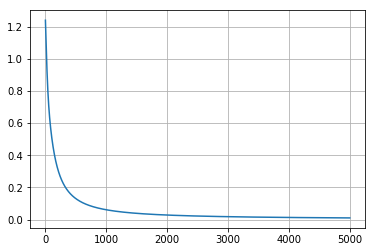

In [4]:
# Let's use the Neural Network class to train our model using training dataset and then predict test dataset
perceptron_network = PerceptronNetwork()

print("Synaptic Weights (Before Training) : %s" % (perceptron_network.synaptic_weight.T))

# Adjust the weights according to out input and output data
perceptron_network.train(training_input, training_output, 5000)

print("Synaptic Weights (After Training) : %s" % (perceptron_network.synaptic_weight.T))

# Let's plot the graph of Cost value w.r.t iteration count
plt.plot(perceptron_network.cost_value)
plt.grid()

In [5]:
# Let's make predection for our testing data, whoes predicted output values is 1
print("Prediction for Testing input is : ", perceptron_network.predict(testing_input))

Prediction for Testing input is :  [0.9973229]
